In [48]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from astropy.io import fits
import scienceplots
plt.style.use(['science', 'notebook', 'grid'])
import Sigma_psi

In [49]:
filename = "/Users/timotheschmidt/Documents/MINES/2A/Stage PNU/Simu/DATA_SIMS/Output00034_size0128_hyperCube.fits"
file = fits.open(filename)
filename2 = "/Users/timotheschmidt/Documents/MINES/2A/Stage PNU/Simu/DATA_SIMS/Output00034_size0128_cube_temp.fits"
file2 = fits.open(filename2)



In [50]:
def Tb_u(x, y, u):     #la LOS est selon z, on regarde donc vz ??? 
    C = 1.823e18
    dz = 1
    v = file[3].data
    n = file[0].data 
    T = file2[0].data
    k_b = 1.38e-23
    m = 1.67e-27
    S = 0
    for z in range(128):
        sigma = np.sqrt(k_b*T[x,y,z]/m)
        S += n[x,y,z]/sigma * np.exp(- (u - v[x,y,z])**2/(2*sigma**2)) * dz
    return S/(C*np.sqrt(2*np.pi))

In [51]:
def Tb(x, y, u_max, u_min, du):
    n = int((u_max - u_min)/du) + 1
    U = np.linspace(u_min, u_max, n)
    Tb = []
    for u in U :
        Tb.append(Tb_u(x, y, u))
    return(Tb)

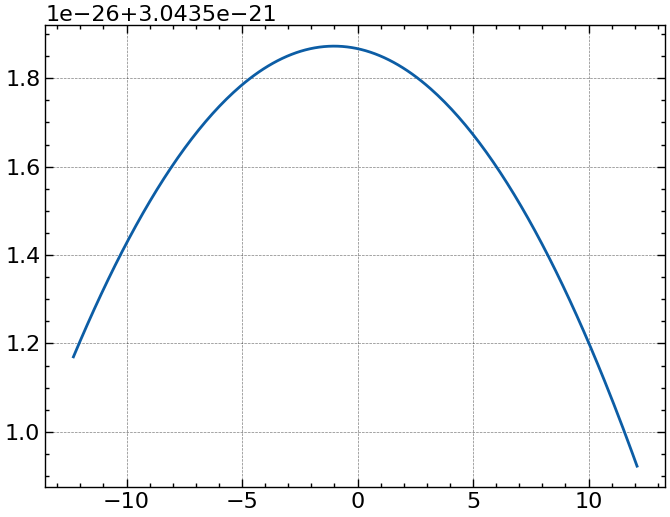

In [68]:
x = 12
y = 5
u_max = 12.1
u_min = -12.3
du = 0.1

n = int((u_max - u_min)/du) + 1
U = np.linspace(u_min, u_max, n)
Temp = Tb(x, y, u_max, u_min, du)


plt.plot(U, Temp)
plt.show()

In [53]:
def C(x,y):
    """Velocity centroid"""
    Num = 0
    Den = 0
    u_max = 12.1
    u_min = -12.3
    du = 0.1
    n = int((u_max - u_min)/du) + 1
    U = np.linspace(u_min, u_max, n)
    
    for u in U:
        Num += u * Tb_u(x,y,u) 
        Den += Tb_u(x,y,u) 
    
    return Num/Den


In [54]:
def sigma_v(x,y):
    Num = 0
    Den = 0
    u_max = 12.1
    u_min = -12.3
    du = 0.1
    n = int((u_max - u_min)/du) + 1
    U = np.linspace(u_min, u_max, n)
    
    for u in U:
        Num += u**2 * Tb_u(x,y,u) 
        Den += Tb_u(x,y,u) 
    
    return np.sqrt(Num/Den - C(x,y)**2)


In [74]:
sigma_v(10,15)

7.072595514402556

In [64]:
def B(file,x,y):

    return np.sqrt(4*np.pi*np.mean(file[0].data, 0)[x,y])* sigma_v(x,y)/Sigma_psi.sigma_psi_global(file)

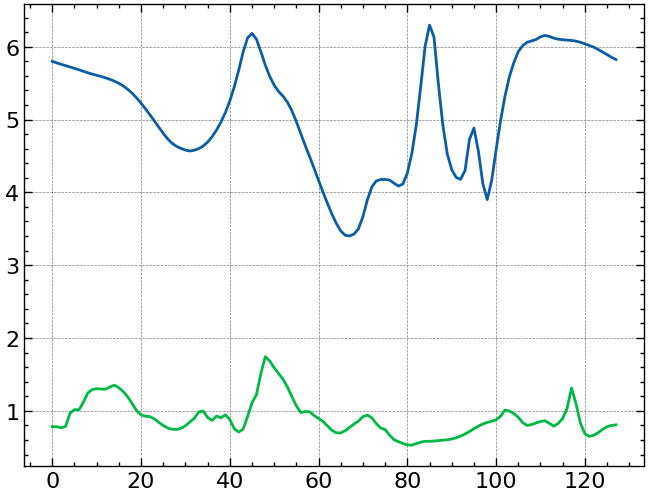

In [73]:
def B_true(y,z):
    B = []
    for x in range(128):
        B.append(np.sqrt(file[4].data[x,y,z]**2 + np.sqrt(file[5].data[x,y,z]**2)) ) 

    return B
B_t = B_true(0,0)
B_exp = [B(file,x,0) for x in range(128)]
x = np.arange(0, 128, 1)

plt.plot(x, B_t)
plt.plot(x, B_exp)

In [ ]:
### Verification de la formule de Tb :
def N_Tb(x,y):
    N = 0
    for z in range(128):
        u = file[3].data[x,y,z]
        N += Tb_u(x,y,u)
    return N

def N(x,y):
    N = 0
    for z in range(128):
        N += file

